# 1

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

# 2

In [17]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

# 9 & 10

In [18]:
def little_clean(x):
    #lower columns
    x.columns=[e.lower().replace(' ', '_') for e in x.columns]  
    #date type
    x['effective_to_date'] = pd.to_datetime(x.effective_to_date)
    x['effective_to_date'] = x.drop(['effective_to_date'], axis = 1)
    #lower values
    for catname in x.select_dtypes('object').columns:
        x[catname]= [e.lower().replace(' ', '_') for e in x[catname]]
        
    return x

customer_df = little_clean(customer_df)

In [19]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,bu79786,washington,2763.519279,no,basic,bachelor,bu79786,employed,f,56274,suburban,married,69,32,5,0,1,corporate_auto,corporate_l3,offer1,agent,384.811147,two-door_car,medsize
1,qz44356,arizona,6979.535903,no,extended,bachelor,qz44356,unemployed,f,0,suburban,single,94,13,42,0,8,personal_auto,personal_l3,offer3,agent,1131.464935,four-door_car,medsize
2,ai49188,nevada,12887.431650,no,premium,bachelor,ai49188,employed,f,48767,suburban,married,108,18,38,0,2,personal_auto,personal_l3,offer1,agent,566.472247,two-door_car,medsize
3,ww63253,california,7645.861827,no,basic,bachelor,ww63253,unemployed,m,0,suburban,married,106,18,65,0,7,corporate_auto,corporate_l2,offer1,call_center,529.881344,suv,medsize
4,hb64268,washington,2813.692575,no,basic,bachelor,hb64268,employed,m,43836,rural,single,73,12,44,0,1,personal_auto,personal_l1,offer1,agent,138.130879,four-door_car,medsize


# 3 & 11

In [20]:
def converter(df):
    continuous  = []
    discrete    = []
    categorical = []
    for col in df.columns:
        if(df[col].dtypes == object): #OBJECTS
            categorical.append(col)
        else:
            if(df[col].dtypes in ['float', 'int', 'int64', 'float64']): #NUMBERS         
                if (len(df[col].unique())) > 1000: #HIGH VALUES means KIND of continuous regression
                    continuous.append(col)
                else:
                    discrete.append(col) 
            else:
                continuous.append(col) #data
            
    return categorical, discrete, continuous

In [21]:
cat_,dis_,con_= converter(customer_df)
ContiniusValues=customer_df[con_]
DiscreteValues=customer_df[dis_]

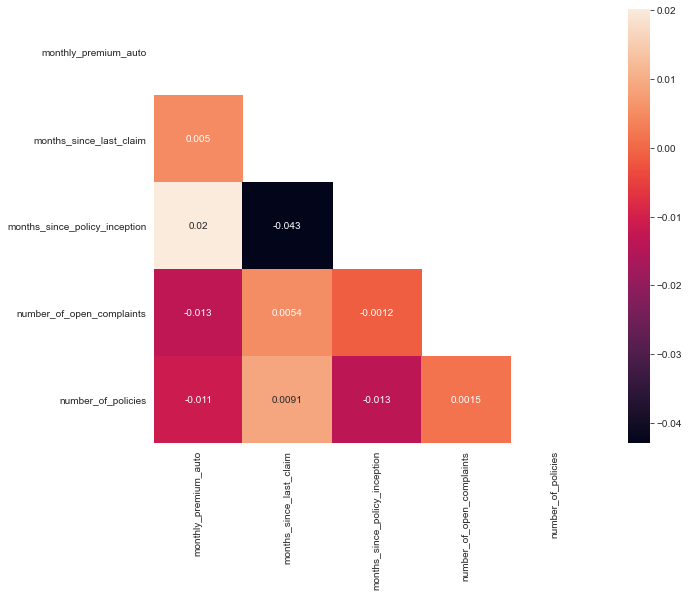

In [22]:
correlations_matrix = DiscreteValues.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

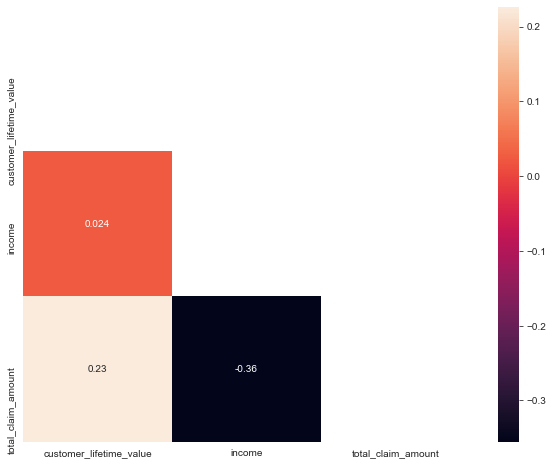

In [23]:
correlations_matrix = ContiniusValues.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# 4

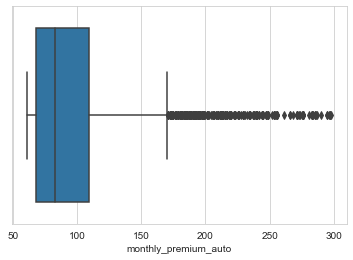

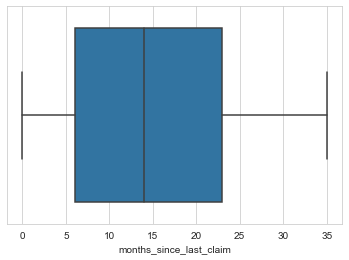

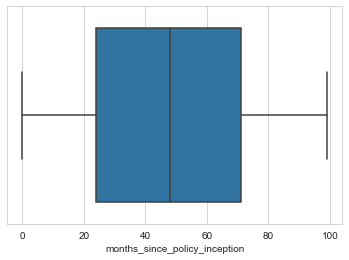

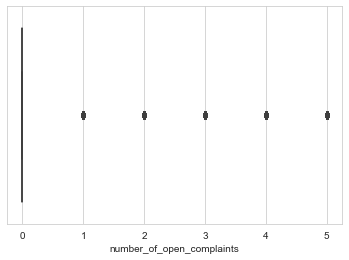

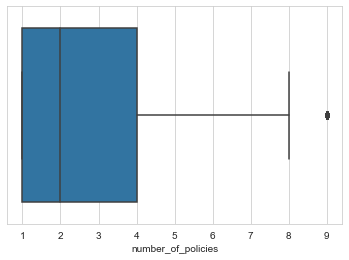

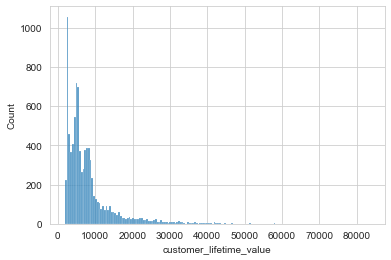

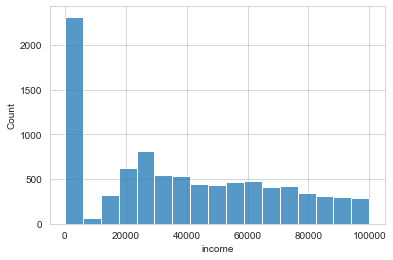

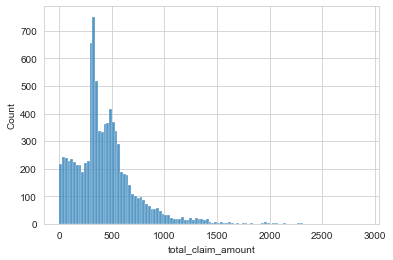

In [52]:
def plot (discrete, continuous):
    for i in discrete.columns:
        sns.boxplot(i, data=customer_df)
        plt.show()
    for y in continuous.columns:
        sns.histplot(customer_df, x = y)
        plt.show()
        
plot(DiscreteValues,ContiniusValues)

# 5

plots

# 6 nd 7

In [43]:
np.percentile(customer_df['number_of_policies'],75)

4.0

In [50]:
def rid_outliners (df):
    for i in df.columns:
        if i != 'number_of_open_complaints':
            #df[i] = df[i].dropna
            iqr = np.percentile(df[i],75) - np.percentile(df[i],25) #interquartile range
            upper_limit = np.percentile(df[i],75) + 1.5*iqr #whysker positions
            lower_limit = np.percentile(df[i],25) - 1.5*iqr
            df = df[(df[i]>lower_limit) & (df[i]<upper_limit)]#filter data through whyskers
            sns.boxplot(i, data=df)
            plt.show()
    return df


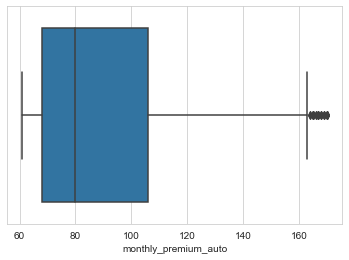

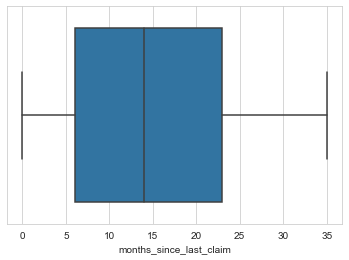

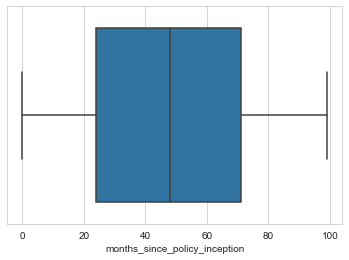

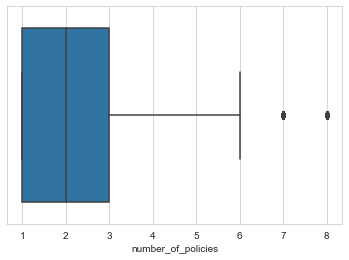

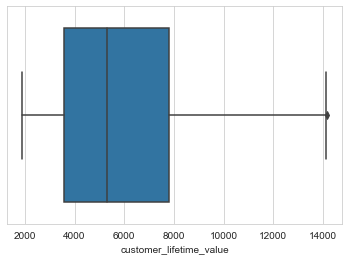

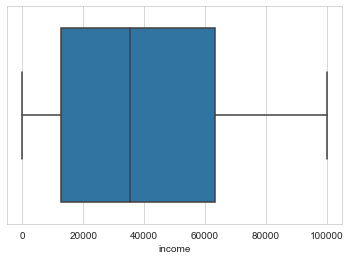

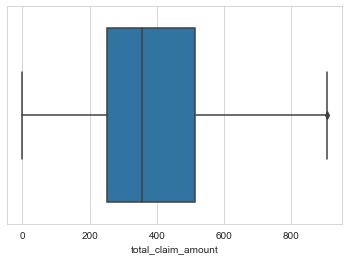

In [51]:
DiscreteValues = rid_outliners(DiscreteValues)
ContiniusValues = rid_outliners(ContiniusValues)

# 8

In [ ]:
customer_df.isna().sum()

In [ ]:
customer_df.isnull().sum()

In [53]:
for i in customer_df.columns:
    percg = (len(customer_df[customer_df[i] == 0][i]) / len(customer_df[i]))
    print(percg)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.25366761550251804
0.0
0.0
0.0
0.03437705276987081
0.009086927961462666
0.7939566455003284
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# 12

In [ ]:
cat=cat.set_index("customer")